<a href="https://colab.research.google.com/github/sachincredible9/Python_basics/blob/main/Stock_data_analysys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd



In [62]:
stock_data= pd.read_csv('StockData.csv')
stock_data.head()
#stock_data

,stock,date,price
0,AAPL,08-02-2013,67.8542
1,AAPL,11-02-2013,68.5614
2,AAPL,12-02-2013,66.8428
3,AAPL,13-02-2013,66.7156
4,AAPL,14-02-2013,66.6556


In [9]:
stock_data.tail()

,stock,date,price
5031,ZTS,01-02-2018,77.82
5032,ZTS,02-02-2018,76.78
5033,ZTS,05-02-2018,73.83
5034,ZTS,06-02-2018,73.27
5035,ZTS,07-02-2018,73.86


In [7]:
stock_data.shape

(5036, 3)

In [10]:
stock_data.describe()

,price
count,5036.000000
mean,73.057030
std,29.011126
min,28.400000
25%,54.067500
50%,69.085000
75%,79.250000
max,179.260000


In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stock   5036 non-null   object 
 1   date    5036 non-null   object 
 2   price   5036 non-null   float64
dtypes: float64(1), object(2)
memory usage: 118.2+ KB


In [15]:
stock_data.columns

Index(['stock', 'date', 'price'], dtype='object')

In [19]:
type(stock_data)

pandas.core.frame.DataFrame

In [38]:
stock_data.groupby(['stock']).price.mean()

,price
stock,
AAPL,109.066698
SNI,71.319206
TJX,66.743566
ZTS,45.098648


In [43]:
stock_data[stock_data['price'] < 100]

,stock,date,price
0,AAPL,08-02-2013,67.8542
1,AAPL,11-02-2013,68.5614
2,AAPL,12-02-2013,66.8428
3,AAPL,13-02-2013,66.7156
4,AAPL,14-02-2013,66.6556
...,...,...,...
5031,ZTS,01-02-2018,77.8200
5032,ZTS,02-02-2018,76.7800
5033,ZTS,05-02-2018,73.8300
5034,ZTS,06-02-2018,73.2700


In [48]:
stock_data[['stock','price','date']].max()

,0
stock,ZTS
price,179.26
date,31-12-2015


In [51]:
min_price_row = stock_data[['stock','price','date']].min()
min_price_row


,0
stock,AAPL
price,28.4
date,01-02-2016


In [52]:
min_price_row.stock

'AAPL'

In [70]:
date_time = pd.to_datetime(min_price_row.date)
date_time


date_time.date
print("Date - ",date_time)
print("Day - ",date_time.day)
print("Month - ",date_time.month)
print("MontName - ",date_time.month_name())
print("year - ",date_time.year)



Date -  2016-01-02 00:00:00
Day -  2
Month -  1
MontName -  January
year -  2016


In [76]:
stock_data.groupby(['stock']).count()

date
stock price        
AAPL  55.7899     1
      56.0071     1
      56.2542     1
      56.6471     1
      56.8671     1
...             ...
ZTS   78.3300     1
      78.3500     1
      79.1800     1
      79.2500     1
      80.0900     1

[4225 rows x 1 columns]

In [77]:
stock_data.groupby(['stock']).price.max()

,price
stock,
AAPL,179.26
SNI,88.77
TJX,82.87
ZTS,80.09


In [115]:
stock_data['price'].idxmax()

1244

In [119]:
stock_data['price'].max()

179.26

In [118]:
stock_data[1244:1245]

,stock,date,price
1244,AAPL,2018-01-18,179.26


In [78]:
stock_data.groupby(['stock']).price.min()

,price
stock,
AAPL,55.7899
SNI,48.1400
TJX,43.5800
ZTS,28.4000


In [79]:
stock_data.groupby(['stock']).price.mean()

,price
stock,
AAPL,109.066698
SNI,71.319206
TJX,66.743566
ZTS,45.098648


### How many unique stocks are in the dataset?

In [81]:
print(f"Number of unique stocks: {stock_data['stock'].nunique()}")
print(f"Unique stocks: {stock_data['stock'].unique()}")

Number of unique stocks: 4
Unique stocks: ['AAPL' 'SNI' 'TJX' 'ZTS']


### What is the overall date range of the stock data?

In [83]:
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%m-%Y')
min_date = stock_data['date'].min()
max_date = stock_data['date'].max()
print(f"Data date range from {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

Data date range from 2013-02-08 to 2018-02-07


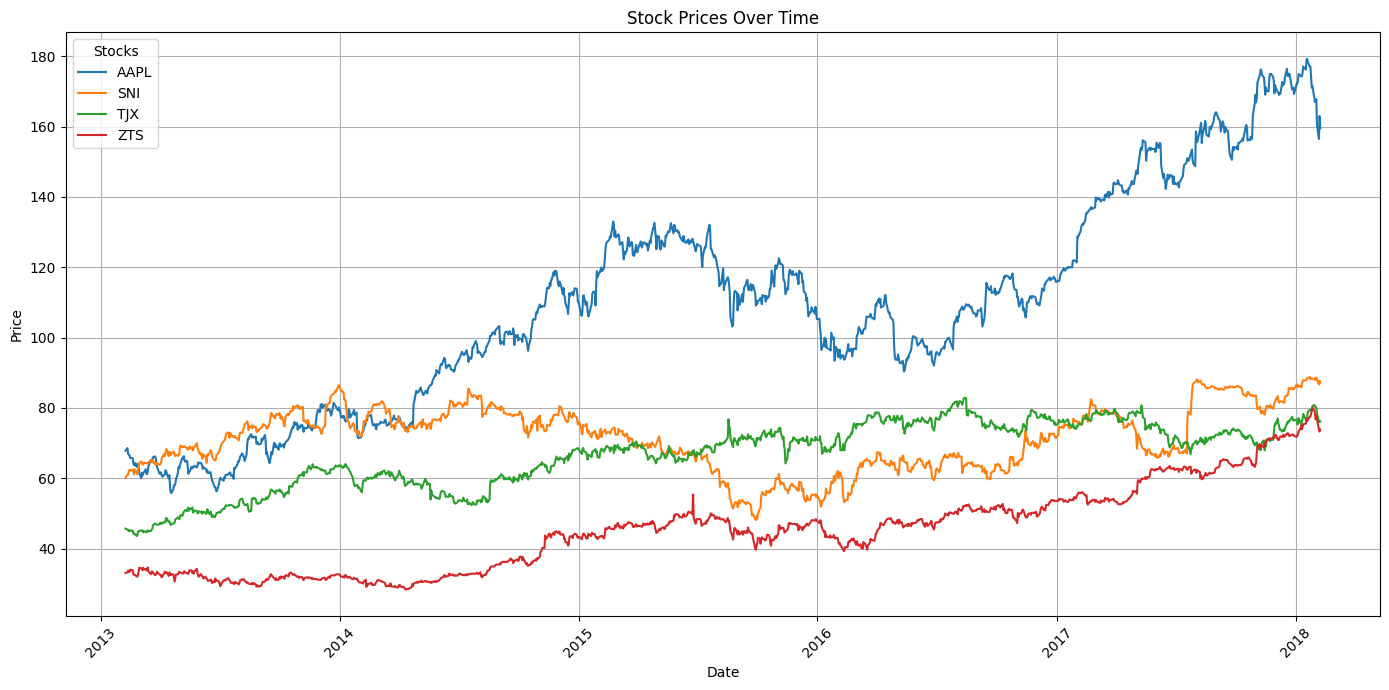

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=stock_data, x='date', y='price', hue='stock')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualize the Distribution of Daily Returns for Each Stock

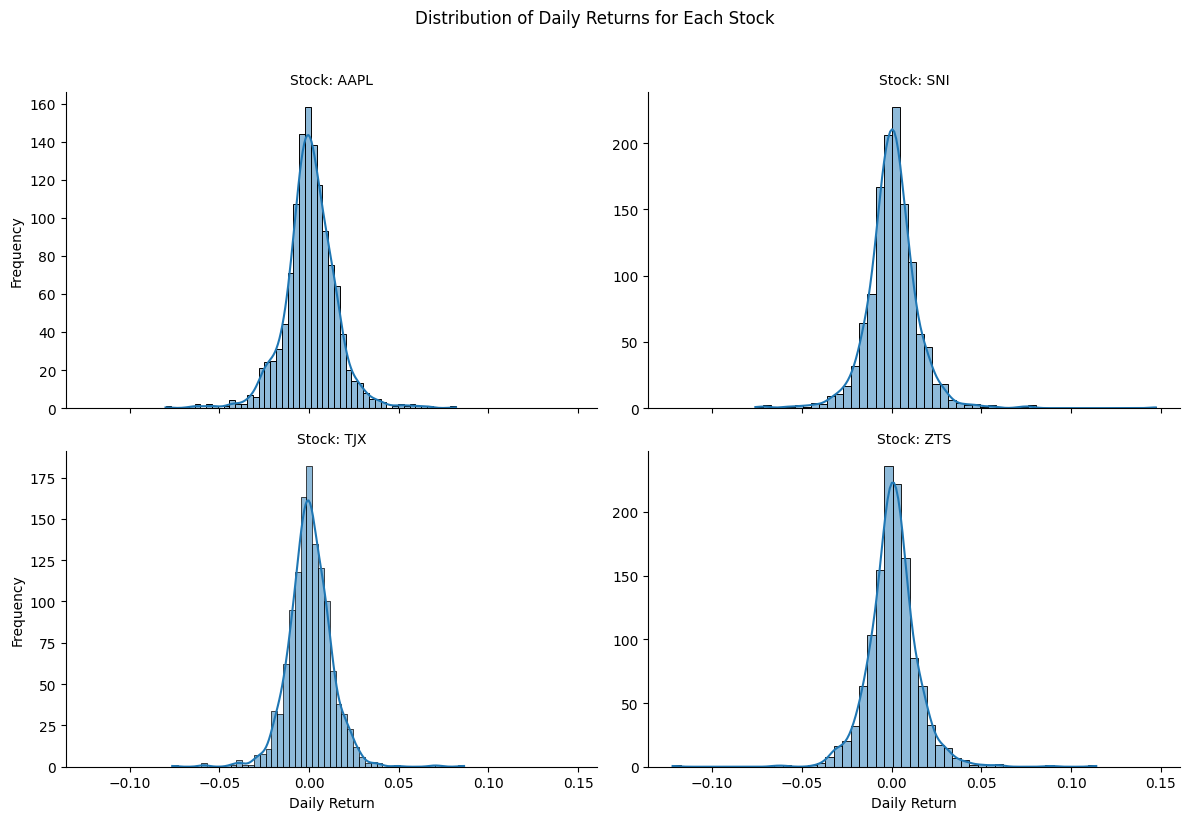

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid to plot histograms for each stock
g = sns.FacetGrid(stock_data_sorted, col='stock', col_wrap=2, height=4, aspect=1.5, sharex=True, sharey=False)
g.map(sns.histplot, 'daily_return', bins=50, kde=True)

g.set_axis_labels('Daily Return', 'Frequency')
g.set_titles('Stock: {col_name}')
plt.suptitle('Distribution of Daily Returns for Each Stock', y=1.02) # Adjust suptitle position
plt.tight_layout()
plt.show()

### Calculate Daily Returns for Each Stock

In [107]:
# Sort the data by stock and date to ensure correct calculation of daily returns
stock_data_sorted = stock_data.sort_values(by=['stock', 'date'])

# Calculate daily returns for each stock
# The .groupby('stock') ensures that pct_change() is applied independently to each stock
stock_data_sorted['daily_return'] = stock_data_sorted.groupby('stock')['price'].pct_change()

# Display the first few rows with the new daily_return column
display(stock_data_sorted.head())

,stock,date,price,daily_return
0,AAPL,2013-02-08,67.8542,NaN
1,AAPL,2013-02-11,68.5614,0.010422
2,AAPL,2013-02-12,66.8428,-0.025067
3,AAPL,2013-02-13,66.7156,-0.001903
4,AAPL,2013-02-14,66.6556,-0.000899


### Visual Comparison of Standard Deviations of Daily Returns

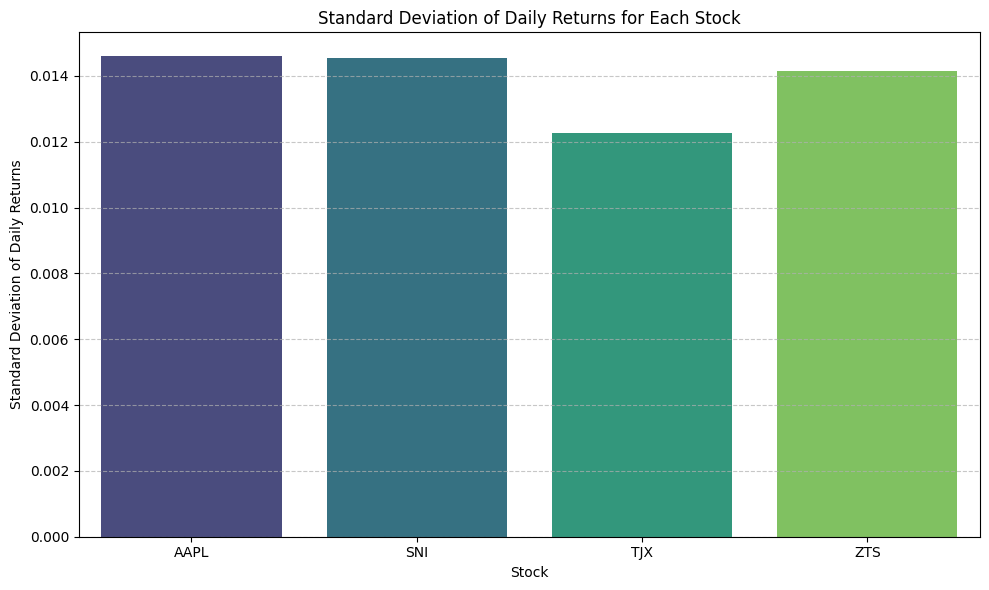

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_returns_std.index, y=daily_returns_std.values, hue=daily_returns_std.index, palette='viridis', legend=False)
plt.title('Standard Deviation of Daily Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation of Daily Returns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Calculate the Standard Deviation of Daily Returns for Each Stock

In [109]:
# Calculate the standard deviation of daily returns for each stock
daily_returns_std = stock_data_sorted.groupby('stock')['daily_return'].std()

print("Standard Deviation of Daily Returns for Each Stock:")
print(daily_returns_std)

Standard Deviation of Daily Returns for Each Stock:
stock
AAPL    0.014593
SNI     0.014544
TJX     0.012279
ZTS     0.014142
Name: daily_return, dtype: float64


### Calculate Average Daily Returns for Each Stock

In [110]:
# Calculate the mean daily return for each stock
average_daily_returns = stock_data_sorted.groupby('stock')['daily_return'].mean()

print("Average Daily Returns for Each Stock:")
print(average_daily_returns)

print("\nTop performing stock based on average daily return:")
print(average_daily_returns.idxmax(), "with an average daily return of", average_daily_returns.max())

Average Daily Returns for Each Stock:
stock
AAPL    0.000786
SNI     0.000400
TJX     0.000482
ZTS     0.000739
Name: daily_return, dtype: float64

Top performing stock based on average daily return:
AAPL with an average daily return of 0.0007861966919191563


### Calculate Maximum Daily Returns for Each Stock

In [121]:
# Calculate the maximum daily return for each stock
max_daily_returns = stock_data_sorted.groupby('stock')['daily_return'].max()

print("Maximum Daily Returns for Each Stock:")
print(max_daily_returns)

print("\nStock with the highest single-day return:")
print(max_daily_returns.idxmax(), "with a maximum daily return of", max_daily_returns.max())

Maximum Daily Returns for Each Stock:
stock
AAPL    0.081982
SNI     0.147269
TJX     0.086456
ZTS     0.114062
Name: daily_return, dtype: float64

Stock with the highest single-day return:
SNI with a maximum daily return of 0.14726947179946293
